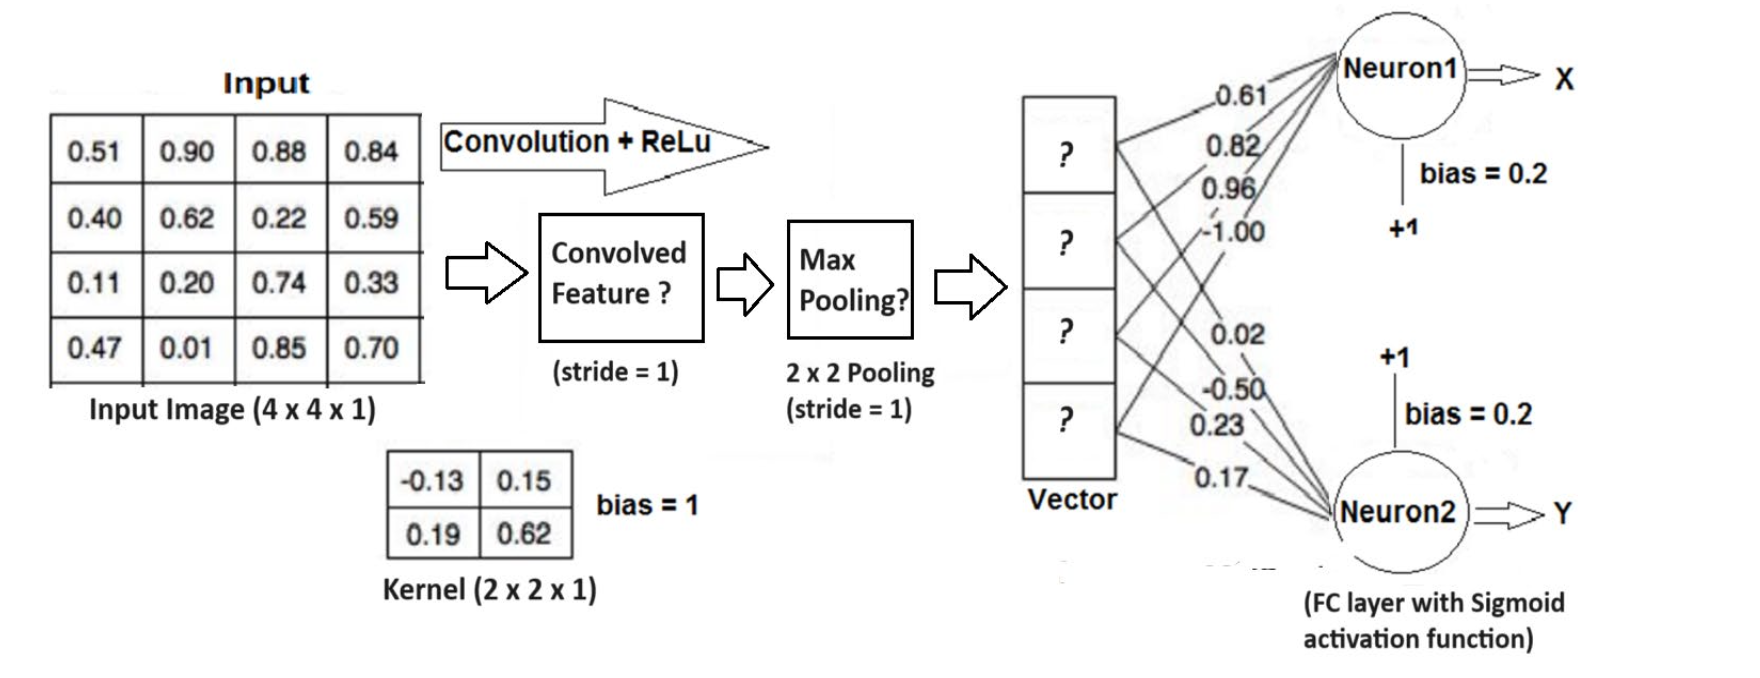

In [10]:
import numpy as np

# Input image and kernel as provided by the user
input_image = np.array([
    [0.51, 0.90, 0.88, 0.84],
    [0.40, 0.62, 0.22, 0.59],
    [0.11, 0.20, 0.74, 0.33],
    [0.47, 0.01, 0.85, 0.70]
])
kernel = np.array([
    [-0.13, 0.15],
    [0.19, 0.62]
])
bias = 1  # Bias for convolution

# Function to perform a convolution on the input image with the given kernel
def convolution2d(image, kernel, stride, bias):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width))
    for i in range(0, image_height - kernel_height + 1, stride):
        for j in range(0, image_width - kernel_width + 1, stride):
            new_image[i//stride, j//stride] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel) + bias
    return new_image

# Apply convolution with ReLU activation (setting negative values to zero)
convoluted_image = convolution2d(input_image, kernel, 1, bias)
convoluted_image[convoluted_image < 0] = 0

# Function for 2x2 max pooling with stride of 1
def maxpooling2d(image, pool_size, stride):
    image_height, image_width = image.shape
    new_height = (image_height - pool_size) // stride + 1
    new_width = (image_width - pool_size) // stride + 1
    new_image = np.zeros((new_height, new_width))
    for i in range(0, new_height):
        for j in range(0, new_width):
            new_image[i, j] = np.max(image[i:i+pool_size, j:j+pool_size])
    return new_image

# Apply max pooling
max_pooled_image = maxpooling2d(convoluted_image, 2, 1)

# Flatten the max pooled image to create a single vector
flattened = max_pooled_image.flatten()

# Fully connected layer
# Since we have 4 elements in the flattened output, we should have 4 weights plus a bias for the neuron
weights = np.array([0.61, -0.96, 1.00, -0.02]) # Example weights; need to be provided based on your neural network's structure
bias_neuron_x = 0.2 # The bias for neuron X
output_neuron_x = np.dot(weights, flattened) + bias_neuron_x

# Define weights for Neuron Y
weights_neuron_y = np.array([0.82, -1.00, 0.50, 0.17])  # Adjust the weights to the correct size
bias_neuron_y = 0.2  # Given bias for Neuron Y

# Calculate the output of Neuron Y

output_neuron_y = np.dot(flattened_feature, weights_neuron_y) + bias_neuron_y
print("Convolved Feature:\n", convolved_feature)
print("ReLU Feature:\n", relu_feature)
print("Max Pooled Feature:\n", max_pooled_feature)
print("Flattened Feature:\n", flattened_feature)
print("\nOutput of Neuron X:",output_neuron_x)
print("\nOutput of Neuron X:",output_neuron_y)

Convolved Feature:
 [[1.5291 1.2692 1.4192]
 [1.1859 1.4492 1.4051]
 [1.1112 1.6139 1.5488]]
ReLU Feature:
 [[1.5291 1.2692 1.4192]
 [1.1859 1.4492 1.4051]
 [1.1112 1.6139 1.5488]]
Max Pooled Feature:
 [[1.5291 1.4492]
 [1.6139 1.6139]]
Flattened Feature:
 [1.5291 1.4492 1.6139 1.6139]

Output of Neuron X: 1.3231410000000001

Output of Neuron X: 1.0859750000000001
